In [ ]:
import json
import os

import pandas as pd

folder = "C:/Users/anast/OneDrive - Datu Analytics Oy/Personal/Assignment/Data engineering/Polar_for_Exercise/"
arr = os.listdir(folder)

# Create an empty list to collect exercises data
exercises_list = []

# Iterate through each file in the folder
for filename in arr:
    path = os.path.join(folder, filename)  # Ensure proper path joining
    with open(path, "r") as file:
        data = json.load(file)

    # Check if 'exercises' exists in the JSON data
    if "exercises" in data:
        exercises_list.extend(data["exercises"])

# Normalize the exercises data to a DataFrame
df_res = pd.json_normalize(exercises_list)

# Display the first few rows of the DataFrame
df_res.head()
df_res.to_csv("polar_data.csv", index=False)

In [ ]:
df_res["samples.heartRate"][0]

[{'dateTime': '2025-01-01T19:31:50.000'},
 {'dateTime': '2025-01-01T19:31:51.000'},
 {'dateTime': '2025-01-01T19:31:52.000'},
 {'dateTime': '2025-01-01T19:31:53.000'},
 {'dateTime': '2025-01-01T19:31:54.000'},
 {'dateTime': '2025-01-01T19:31:55.000'},
 {'dateTime': '2025-01-01T19:31:56.000'},
 {'dateTime': '2025-01-01T19:31:57.000'},
 {'dateTime': '2025-01-01T19:31:58.000', 'value': 86},
 {'dateTime': '2025-01-01T19:31:59.000', 'value': 86},
 {'dateTime': '2025-01-01T19:32:00.000', 'value': 86},
 {'dateTime': '2025-01-01T19:32:01.000', 'value': 87},
 {'dateTime': '2025-01-01T19:32:02.000', 'value': 88},
 {'dateTime': '2025-01-01T19:32:03.000', 'value': 89},
 {'dateTime': '2025-01-01T19:32:04.000', 'value': 89},
 {'dateTime': '2025-01-01T19:32:05.000', 'value': 88},
 {'dateTime': '2025-01-01T19:32:06.000', 'value': 89},
 {'dateTime': '2025-01-01T19:32:07.000', 'value': 90},
 {'dateTime': '2025-01-01T19:32:08.000', 'value': 91},
 {'dateTime': '2025-01-01T19:32:09.000', 'value': 92},
 {'d

<function matplotlib.pyplot.grid(visible: 'bool | None' = None, which: "Literal['major', 'minor', 'both']" = 'major', axis: "Literal['both', 'x', 'y']" = 'both', **kwargs) -> 'None'>

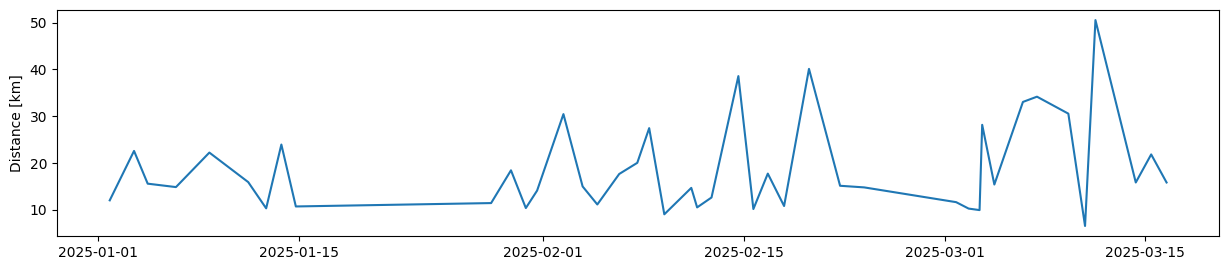

In [ ]:
# Visualise the distance of workout

import matplotlib.pyplot as plt

df_res["startTime"] = pd.to_datetime(df_res["startTime"], format="%Y-%m-%dT%H:%M:%S.%f")
df_res["stopTime"] = pd.to_datetime(df_res["stopTime"], format="%Y-%m-%dT%H:%M:%S.%f")

plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
plt.plot(df_res["startTime"], df_res["distance"] / 1000)
plt.ylabel("Distance [km]")
plt.grid

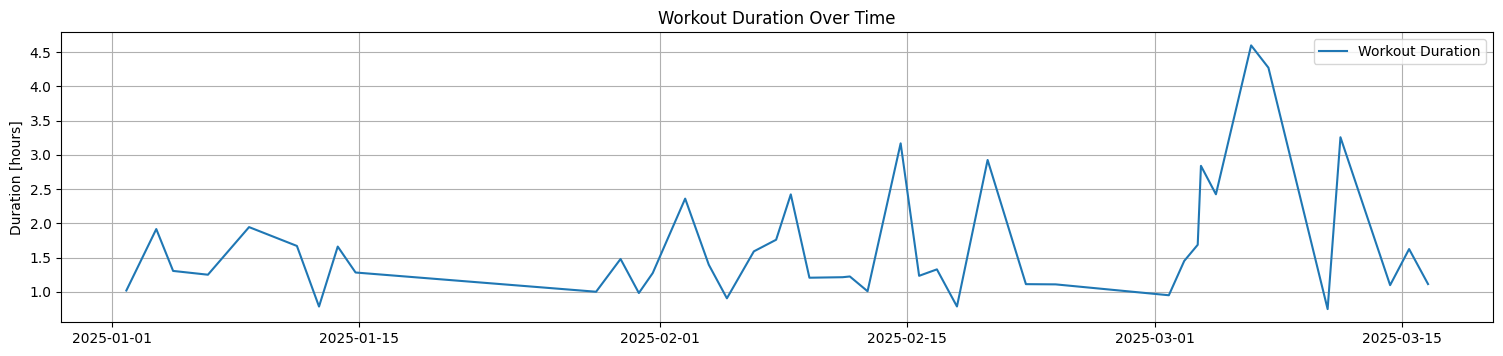

In [ ]:
# visualise the duration in hours of workout

# Ensure your 'startTime' and 'stopTime' are in datetime format
df_res["startTime"] = pd.to_datetime(df_res["startTime"], format="%Y-%m-%dT%H:%M:%S.%f")
df_res["stopTime"] = pd.to_datetime(df_res["stopTime"], format="%Y-%m-%dT%H:%M:%S.%f")

# Calculate the workout duration in hours
df_res["duration"] = (
    df_res["stopTime"] - df_res["startTime"]
).dt.total_seconds() / 3600  # Convert seconds to hours

# Plot the data
plt.figure(figsize=(15, 10))

# Plot the workout duration
plt.subplot(3, 1, 1)
plt.plot(
    df_res["startTime"], df_res["duration"], label="Workout Duration", color="tab:blue"
)
plt.ylabel("Duration [hours]")
plt.title("Workout Duration Over Time")
plt.grid(True)
plt.legend()

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


In [ ]:
#  Visualise individual exercise
# Check json structure
with open(path, "r") as file:
    data = json.load(file)


# Read the json structure
def print_structure(obj, indent=0):
    prefix = " " * indent
    if isinstance(obj, dict):
        for k, v in obj.items():
            print(f"{prefix}{k}: {type(v).__name__}")
            print_structure(v, indent + 4)
    elif isinstance(obj, list):
        print(f"{prefix}List[{len(obj)}]")
        if obj:
            print_structure(obj[0], indent + 4)


print_structure(data)


exportVersion: str
name: str
deviceId: str
feeling: str
latitude: float
longitude: float
startTime: str
stopTime: str
timeZoneOffset: int
distance: float
duration: str
maximumHeartRate: int
averageHeartRate: int
kiloCalories: int
physicalInformationSnapshot: dict
    dateTime: str
    sex: str
    birthday: str
    height, cm: float
    weight, kg: float
    vo2Max: int
    maximumHeartRate: int
    restingHeartRate: int
    aerobicThreshold: int
    anaerobicThreshold: int
    sleepGoal: str
exercises: list
    List[1]
        startTime: str
        stopTime: str
        timezoneOffset: int
        duration: str
        distance: float
        sport: str
        latitude: float
        longitude: float
        ascent: float
        descent: float
        kiloCalories: int
        altitude: dict
            min: float
            avg: float
            max: float
        heartRate: dict
            min: int
            avg: int
            max: int
        speed: dict
            avg: 

<function matplotlib.pyplot.show(close=None, block=None)>

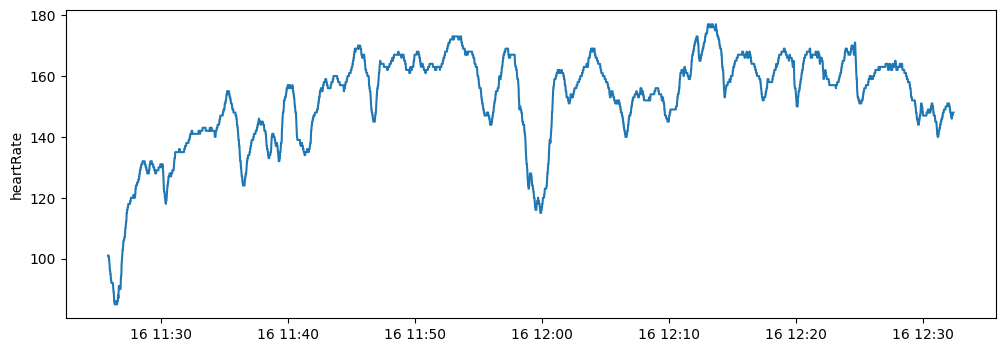

In [ ]:
# Heart rate
key = "heartRate"
hr_smaples = data["exercises"][0]["samples"][key]
df_train = pd.DataFrame(hr_smaples)
df_train["dateTime"] = pd.to_datetime(
    df_train["dateTime"], format="%Y-%m-%dT%H:%M:%S.%f"
)
plt.figure(figsize=(12, 4))
plt.plot(df_train["dateTime"], df_train["value"])
plt.ylabel(key)
plt.show